In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
veriler = pd.read_csv('maaslar.csv')

x = veriler.iloc[:,1:2]
y = veriler.iloc[:,2:]
X = x.values
Y = y.values

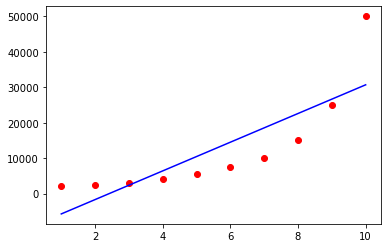

In [3]:
#linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

plt.scatter(X,Y,color='red')
plt.plot(x,lin_reg.predict(X), color = 'blue')
plt.show()


[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


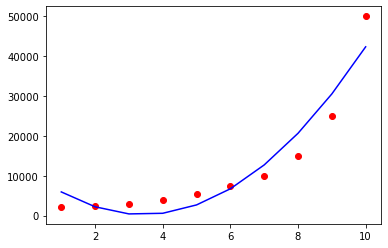

In [4]:
#polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(X)
print(x_poly)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)
plt.scatter(X,Y,color = 'red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.show()

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


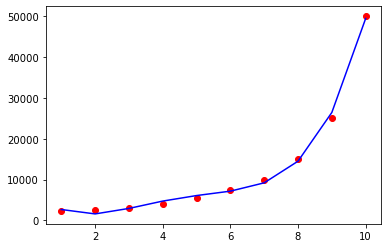

In [5]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(X)
print(x_poly)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)
plt.scatter(X,Y,color = 'red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.show()


In [6]:
print(lin_reg.predict([[11]]))
print(lin_reg.predict([[6.6]]))

[[34716.66666667]]
[[16923.33333333]]


In [7]:
print(lin_reg2.predict(poly_reg.fit_transform([[6.6]])))
print(lin_reg2.predict(poly_reg.fit_transform([[11]])))

[[8146.9948718]]
[[89041.66666667]]


In [8]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scx=sc.fit_transform(X)

sc1=StandardScaler()
scy=sc1.fit_transform(Y)

C:\Users\kadir\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


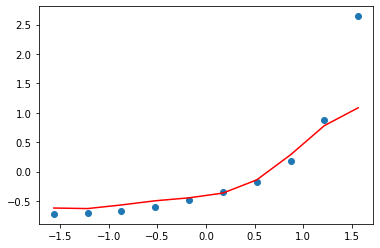

In [9]:
from sklearn.svm import SVR

svr_reg=SVR(kernel="rbf")
svr_reg.fit(scx,scy)

tahmin=svr_reg.predict(scx)

plt.scatter(scx,scy)
plt.plot(scx,tahmin,color="red")

In [10]:
tahmn=svr_reg.predict(([[6]]))
print(tahmn)

[0.01150915]


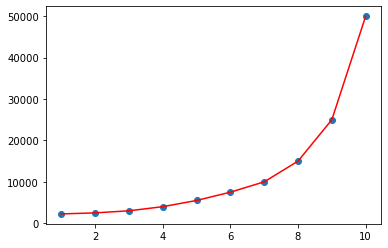

In [11]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X,Y)
pred=dtr.predict(X)
plt.scatter(X,Y)
plt.plot(X,pred,color="red")

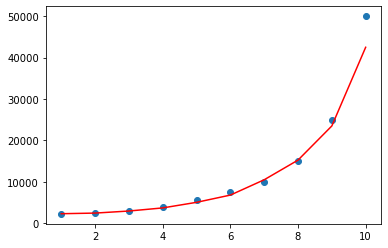

In [12]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=10,random_state=0)
rf.fit(X,Y.ravel())
rfpred=rf.predict(X)
plt.scatter(X,Y)
plt.plot(X,rfpred,color="red")

In [16]:
from sklearn.metrics import r2_score
print(r2_score(Y,rfpred))

0.9704434230386582


In [15]:
print(r2_score(Y,pred))

1.0


In [19]:
print(r2_score(scy,tahmin))

0.7513836788854973


In [20]:
print(r2_score(Y,lin_reg2.predict(poly_reg.fit_transform(X))))

0.9973922891706613
